<a href="https://colab.research.google.com/github/Andres92DS/DS3-Coderhouse/blob/main/Proyecto_DS3__Andres_Avila_Chacon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Modelo Deep Learning IMDb

**Objetivo:**
 El objetivo de este proyecto es desarrollar un modelo de Deep Learning que pueda predecir el éxito de una película en función de varias características clave, como el género, la duración, el año de producción, el certificado de calificación, el número de votos, y la descripción textual. Se busca explorar cómo estos factores influyen en la calificación de una película y construir un modelo que pueda predecir la calificación (rating) de las películas utilizando estas características.

 **Hipótesis:**
  Las características de una película, como su género, duración, año de producción, y certificado de calificación, tienen un impacto significativo en su calificación en IMDb. Específicamente, películas con una duración moderada, producidas en años recientes, y clasificadas en géneros populares tienden a recibir mejores calificaciones. Además, la cantidad de votos también es un indicador de popularidad que podría correlacionarse positivamente con una mayor calificación.

**METADATA**
Utilizaremos un dataset proporcionado por kaggle correspondiente a IMDb, de peliculas.

Atributos:
Titulo, año, certificado, duracion, genero, rating, descripcion, estrellas y votos

In [ ]:
#Librerias a utilizar
import  numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Ruta relativa desde la carpeta montada
file_path = '/content/drive/MyDrive/Proyecto DATA SCIENCE 3/IMBD.csv'
# Cargar el DataFrame
df = pd.read_csv('/content/drive/MyDrive/Proyecto DATA SCIENCE 3/IMBD.csv')
# Especificar el separador (;) al cargar el DataFrame
df = pd.read_csv('/content/drive/MyDrive/Proyecto DATA SCIENCE 3/IMBD.csv', sep=',')
# Reiniciar el índice
df = df.reset_index(drop=True)

#**EDA - Analisis Exploratorio de datos**


In [ ]:
df.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


In [ ]:
df.shape

(9957, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [ ]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

title             0
year            527
certificate    3453
duration       2036
genre            73
rating         1173
description       0
stars             0
votes          1173
dtype: int64


Nos encontramos con gran cantidad de valores nulos en year, certificate, duration, genre, rating, votes.

vamos a tratar para luego graficar.

In [ ]:
#Year metodo ffill, que propaga la ultima observacion valida a la siguiente valida
df['year'].fillna(method='ffill', inplace=True)

<ipython-input-11-0785eaf6c601>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['year'].fillna(method='ffill', inplace=True)


In [ ]:
#Certfiicate metodo moda
df['certificate'].fillna(df['certificate'].mode()[0], inplace=True)

In [ ]:
#Estandarizar columna duration
import re

# Función para extraer la parte numérica de la cadena
def convert_duration_to_minutes(duration_str):
    # Usar expresión regular para extraer el número de minutos
    match = re.search(r'(\d+)\s*min', duration_str)
    if match:
        return int(match.group(1))  # Convertir a entero
    else:
        return None  # En caso de que no coincida el patrón, retornar None

# Aplicar la función a la columna 'duration'
df['duration'] = df['duration'].apply(lambda x: convert_duration_to_minutes(x) if isinstance(x, str) else x)

# Verificar la conversión
print(df['duration'].head())

0     30.0
1     58.0
2     46.0
3    356.0
4     24.0
Name: duration, dtype: float64


In [ ]:
# Imputar valores nulos con la mediana
df['duration'].fillna(df['duration'].median(), inplace=True)

In [ ]:
#Genre moda
df['genre'].fillna(df['genre'].mode()[0], inplace=True)

In [ ]:
#rating mediana
df['rating'].fillna(df['rating'].median(), inplace=True)

In [ ]:
# Convert 'votes' column to numeric type, removing commas and handling errors
df['votes'] = pd.to_numeric(df['votes'].str.replace(',', ''), errors='coerce')

# Fill null values in 'votes' column with the median
df['votes'].fillna(df['votes'].median(), inplace=True)

In [ ]:
# Verificar que no queden valores nulos
valores_nulos_post_tratamiento = df.isnull().sum()
print(valores_nulos_post_tratamiento)

title          0
year           0
certificate    0
duration       0
genre          0
rating         0
description    0
stars          0
votes          0
dtype: int64


In [ ]:
estadisticas = df.describe().round(2)
print(estadisticas)

       duration   rating       votes
count   9957.00  9957.00     9957.00
mean      72.39     6.78    17363.07
std       44.93     1.14    82469.77
min        1.00     1.70        5.00
25%       46.00     6.20      358.00
50%       67.00     6.90     1187.00
75%       93.00     7.50     4260.00
max      990.00     9.90  1844075.00


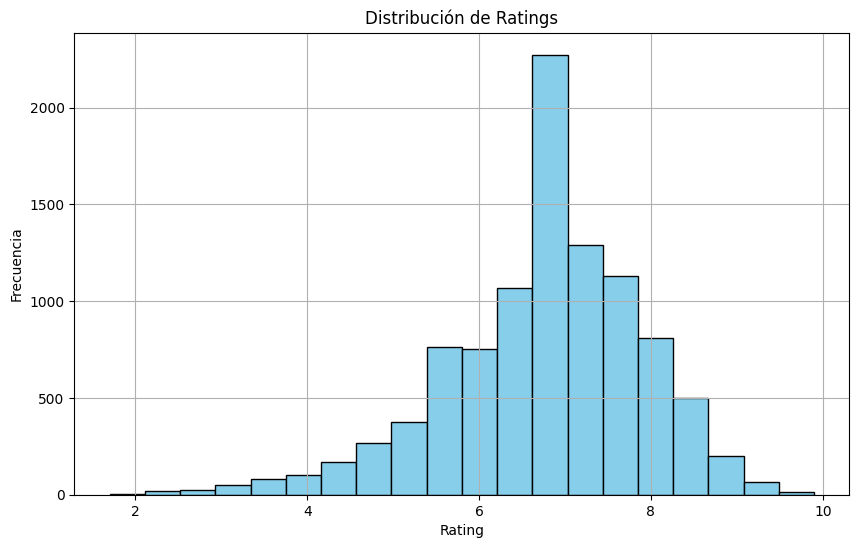

In [ ]:
# Histograma de los ratings
plt.figure(figsize=(10, 6))
plt.hist(df['rating'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

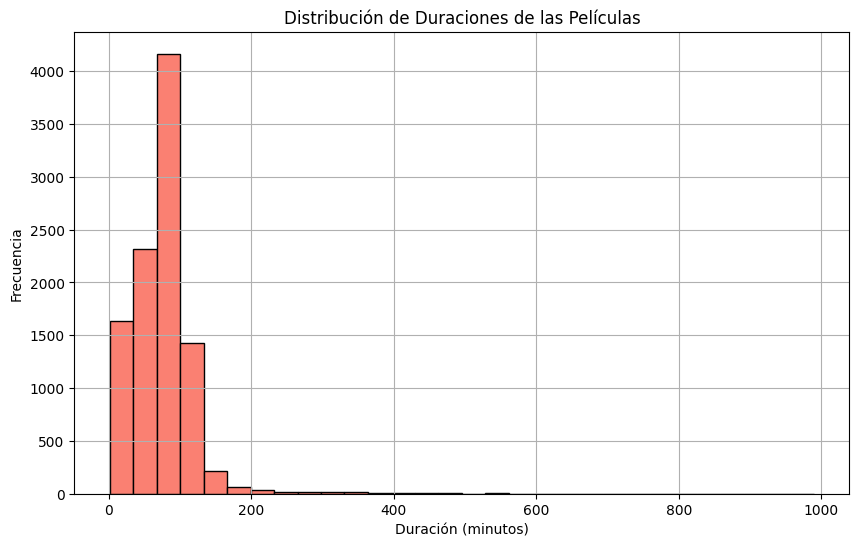

In [ ]:
# Histograma de las duraciones
plt.figure(figsize=(10, 6))
plt.hist(df['duration'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribución de Duraciones de las Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


In [ ]:
# Función para extraer el primer año de la cadena
def extract_first_year(year_str):
    if isinstance(year_str, str):
        match = re.search(r'\d{4}', year_str) # Assign the result of re.search to a variable
        if match: # Check if a match was found before calling .group()
            return match.group()
    return None

# Aplicar la función a la columna 'year'
df['year'] = df['year'].apply(extract_first_year).astype(float)

# Verificar los resultados
print(df['year'].head())

0    2018.0
1    2016.0
2    2015.0
3    2022.0
4    2022.0
Name: year, dtype: float64


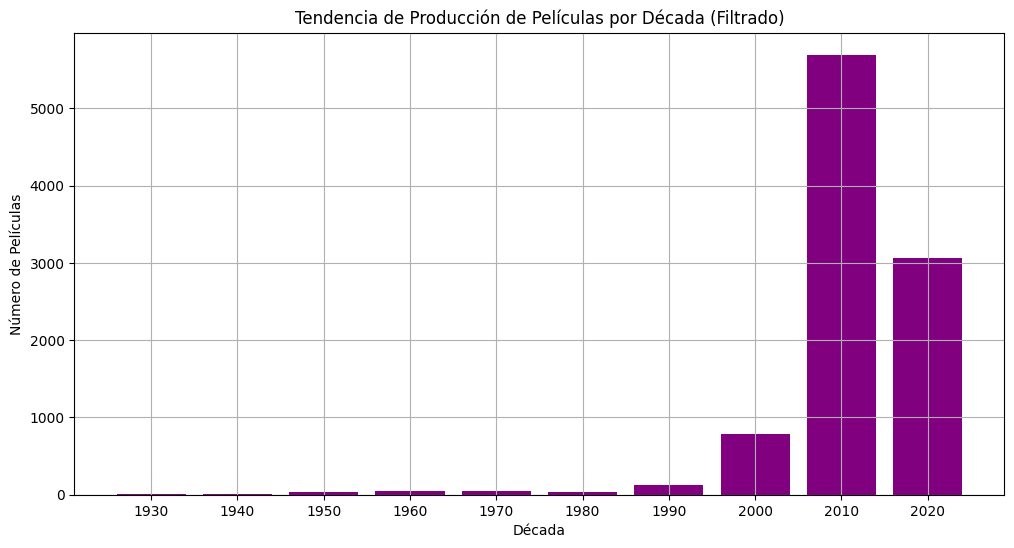

In [ ]:
# Crear una nueva columna que agrupe por décadas
df['decade'] = (df['year'].fillna(0).astype(int) // 10) * 10 # Fill NaN values with 0 before converting to integer

# Contar el número de películas por década
decade_trend = df['decade'].value_counts().sort_index()

# Filtrar décadas inválidas (por ejemplo, valores menores a 1900)
df_filtered = df[df['decade'] >= 1900]

# Volver a generar el gráfico
decade_trend_filtered = df_filtered['decade'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(decade_trend_filtered.index.astype(int).astype(str), decade_trend_filtered.values, color='purple')
plt.title('Tendencia de Producción de Películas por Década (Filtrado)')
plt.xlabel('Década')
plt.ylabel('Número de Películas')
plt.grid(True)
plt.show()

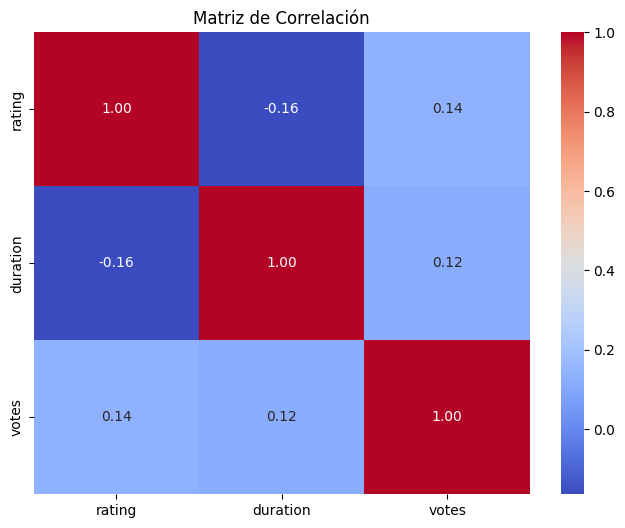

In [ ]:
# Matriz de correlación
correlation_matrix = df[['rating', 'duration', 'votes']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
genre_counts = df['genre'].value_counts()
print (genre_counts)


genre
Comedy                             932
Drama                              587
Animation, Action, Adventure       553
Documentary                        518
Comedy, Drama                      284
                                  ... 
Animation, Action, History           1
Drama, Romance, Western              1
Documentary, Adventure, History      1
Drama, Horror, Romance               1
News, Reality-TV                     1
Name: count, Length: 569, dtype: int64


#**Resumen EDA**

1. **Distribución de Duraciones (Duration)**

La mayoría de las películas en el dataset tienen una duración de alrededor de 60 a 90 minutos, con una media de aproximadamente 72 minutos. Sin embargo, hay algunas películas con duraciones extremas, como una duración máxima de 990 minutos, lo que podría indicar entradas atípicas o películas muy largas (documentales, series, etc.).
Recomendación: Considerar la posibilidad de revisar o eliminar los valores extremos si no son representativos para el análisis general.
2. **Distribución de Ratings**

La distribución de las calificaciones es asimétrica hacia la derecha, con la mayoría de las películas obteniendo calificaciones entre 6 y 8. La calificación promedio es de 6.78.
Recomendación: Podrías investigar más sobre las películas con calificaciones muy bajas o muy altas para entender mejor qué características las diferencian.
3. **Matriz de Correlación**

La correlación entre las variables rating, duration, y votes es baja en todos los casos, lo que sugiere que no hay una relación lineal fuerte entre estas variables. En particular, la correlación entre rating y votes es solo 0.14, lo que indica que una mayor cantidad de votos no necesariamente significa una mejor calificación.
Recomendación: Aunque las correlaciones lineales son bajas, podría ser interesante explorar relaciones no lineales o realizar un análisis de regresión múltiple para investigar más a fondo.
4. **Tendencia de Producción de Películas por Década**

Se observa un incremento significativo en la producción de películas desde la década de 2000, alcanzando su punto máximo en la década de 2010. Este aumento podría reflejar la creciente accesibilidad a las herramientas de producción y distribución de cine, especialmente con el auge de las plataformas de streaming.
Recomendación: Este aumento en la producción podría implicar que hay más competencia para obtener calificaciones altas. Podría ser útil explorar si la calidad media (calificaciones) ha cambiado a medida que se ha producido más contenido.
5. **Conteo de Géneros**

El género más común es "Comedy", seguido de "Drama". Hay una gran diversidad de géneros en el dataset, como lo muestra la gran cantidad de combinaciones únicas de géneros (569 en total).
Recomendación: Podría ser útil agrupar géneros similares o analizar cómo diferentes combinaciones de géneros afectan las calificaciones y la popularidad.
6. **Estadísticas Descriptivas**

Duración: La media es de 72.39 minutos, con una desviación estándar de 44.93 minutos.

Rating: La media es de 6.78, con una desviación estándar de 1.14.

Votes: Los votos tienen una distribución muy dispersa, con un valor máximo de 1,844,075, lo que indica que algunas películas son extremadamente populares.

Recomendación: Considerar el uso de escalado (normalización) para las variables numéricas antes de introducirlas en un modelo predictivo, debido a las grandes diferencias en las escalas de votes, rating y duration.

#**Modelo DL**


In [ ]:
#Codificacion variables categóricas
# Codificación One-Hot de la columna 'genre'
df_encoded = pd.get_dummies(df, columns=['genre'], drop_first=True)


In [ ]:
# Eliminar las columnas irrelevantes 'certificate' y 'stars'
df_reducido = df_encoded.drop(columns=['title', 'description', 'certificate', 'stars'])

# Verificar que todas las columnas restantes sean numéricas
print(X.dtypes)

year                        float64
duration                    float64
votes                       float64
decade                        int64
genre_Action, Adventure        bool
                             ...   
genre_Talk-Show                bool
genre_Thriller                 bool
genre_Thriller, Mystery        bool
genre_Western                  bool
genre_Western, Adventure       bool
Length: 572, dtype: object


In [ ]:
#valores Nan
valores_nulos = df_reducido.isnull().sum()
print(valores_nulos)

year                        119
duration                      0
rating                        0
votes                         0
decade                        0
                           ... 
genre_Talk-Show               0
genre_Thriller                0
genre_Thriller, Mystery       0
genre_Western                 0
genre_Western, Adventure      0
Length: 573, dtype: int64


In [ ]:
#cambiar nan por moda columna year
df_reducido['year'].fillna(df_reducido['year'].mode()[0], inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df_reducido.drop(columns = ['rating'])  # Todas las columnas excepto 'rating'
y = df_reducido['rating']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Aplicar Min-Max Scaling a las columnas numéricas
scaler = MinMaxScaler()
X_test[['duration', 'votes']] = scaler.fit_transform(X_test[['duration', 'votes']])


In [ ]:
# Verificar los resultados después de la normalización
print(X_test.describe())

              year     duration        votes       decade
count  1992.000000  1992.000000  1992.000000  1992.000000
mean   2015.910141     0.154762     0.011300  1987.033133
std       8.071781     0.088320     0.053997   219.663875
min    1932.000000     0.000000     0.000000     0.000000
25%    2015.000000     0.098039     0.000175  2010.000000
50%    2018.000000     0.143791     0.000641  2010.000000
75%    2020.000000     0.200436     0.002427  2020.000000
max    2024.000000     1.000000     1.000000  2020.000000


In [ ]:
# Verificar valores faltantes en X_test y y_test
print("Valores faltantes en X_test:", X_test.isnull().sum().sum())
print("Valores faltantes en y_test:", y_test.isnull().sum())

Valores faltantes en X_test: 0
Valores faltantes en y_test: 0


In [ ]:
# Imputar valores faltantes en 'year' con la moda
year_mode = X_test['year'].mode()[0]  # Encontrar la moda
X_test['year'].fillna(year_mode, inplace=True)

In [ ]:
# Verificar valores faltantes en X_test y y_test
print("Valores faltantes en X_test:", X_test.isnull().sum().sum())
print("Valores faltantes en y_test:", y_test.isnull().sum())

Valores faltantes en X_test: 0
Valores faltantes en y_test: 0


In [ ]:
# Verificar si hay valores infinitos en X_test
print("Valores infinitos en X_test:", np.isinf(X_test).sum().sum())

Valores infinitos en X_test: 0


In [ ]:
# Verificar estadísticas de y_test
print(y_test.describe())

count    1992.000000
mean        6.784588
std         1.139033
min         2.000000
25%         6.200000
50%         6.900000
75%         7.500000
max         9.600000
Name: rating, dtype: float64


In [ ]:
# Verificar si hay valores NaN o Inf en X_test
print("Valores NaN en X_test:", np.isnan(X_test).sum().sum())
print("Valores Inf en X_test:", np.isinf(X_test).sum().sum())

Valores NaN en X_test: 0
Valores Inf en X_test: 0


In [ ]:
# Reconstruir y entrenar el modelo desde cero con una tasa de aprendizaje más
# baja
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Utilizar una tasa de aprendizaje más baja
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 148.4555 - mae: 4.3973 - val_loss: 15.0555 - val_mae: 1.3750
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3762 - mae: 1.0664 - val_loss: 1.5323 - val_mae: 0.9166
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3455 - mae: 0.8810 - val_loss: 1.4618 - val_mae: 0.9731
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.3231 - mae: 0.8828 - val_loss: 1.3404 - val_mae: 0.8447
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.2563 - mae: 0.8401 - val_loss: 1.3865 - val_mae: 0.9310
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2770 - mae: 0.8567 - val_loss: 1.3561 - val_mae: 0.9113
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2544 - mae: 0.8504 - val_loss: 1.4605 - val_mae: 0.8764
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2168 - mae: 0.8408 - val_loss: 1.2880 - val_mae: 0.8289
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.23

In [ ]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                     │ (None, 64)                  │          36,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 116,357 (454.52 KB)

 Trainable params: 38,785 (151.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 77,572 (303.02 KB)

In [ ]:
#metricas del modelo
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error (MAE): {mae}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1297 - mae: 1.1370
Mean Absolute Error (MAE): 1.1181325912475586


Un MAE de 1.11 sugiere que en promedio, las predicciones del modelo están a  1 punto de la calificación real de *las* películas, lo cual puede considerarse un buen rendimiento dependiendo de la escala de las calificaciones.

Como primer modelo  oarece estar fybcuibab correctamente, procedemos a  realizar ajustes para luego comparar

1. Ajuste de Hiperparámetros
Vamos a probar con una tasa de aprendizaje ligeramente más alta y modificar el número de épocas si es necesario.

2. Aumentar la Complejidad del Modelo
Vamos a agregar una capa adicional y ajustar el número de neuronas.

3. Regularización
Vamos a incluir una capa de Dropout y considerar la regularización L2.

4. Optimización del Rendimiento
Vamos a implementar Early Stopping y experimentar con diferentes tamaños de batch.

5. Evaluación y Comparación
Vamos a generar curvas de aprendizaje para monitorear el rendimiento.

In [ ]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
# Construcción del modelo 2
model2 = Sequential()

# Capas del modelo
model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)))
model2.add(Dropout(0.5))  # Añadir Dropout para prevenir sobreajuste
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dense(16, activation='relu'))  # Nueva capa con 16 neuronas
model2.add(Dense(1, activation='linear'))

# Compilación del modelo con una tasa de aprendizaje ligeramente más alta
model2.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mae'])

# Implementar Early Stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo
history = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1410.0126 - mae: 26.7885 - val_loss: 33.7145 - val_mae: 5.6632
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 74.3411 - mae: 6.7601 - val_loss: 8.8845 - val_mae: 2.7395
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 28.0410 - mae: 4.2172 - val_loss: 4.9737 - val_mae: 1.9562
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12.9189 - mae: 2.7515 - val_loss: 4.1349 - val_mae: 1.7627
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9693 - mae: 2.1350 - val_loss: 5.3654 - val_mae: 2.0739
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.2137 - mae: 1.7678 - val_loss: 5.6261 - val_mae: 2.1404
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9806 - mae: 1.5309 - val_loss: 6.2750 - val_mae: 2.2703
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5602 - mae: 1.4327 - val_loss: 5.5685 - val_mae: 2.1238
Epoch 9/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
# Evaluación del modelo
loss, mae = model2.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error (MAE) en el conjunto de prueba: {mae}')

Mean Absolute Error (MAE) en el conjunto de prueba: 1.7985354661941528


In [ ]:
model2.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                     │ (None, 64)                  │          36,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,893 (460.52 KB)

 Trainable params: 39,297 (153.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 78,596 (307.02 KB)

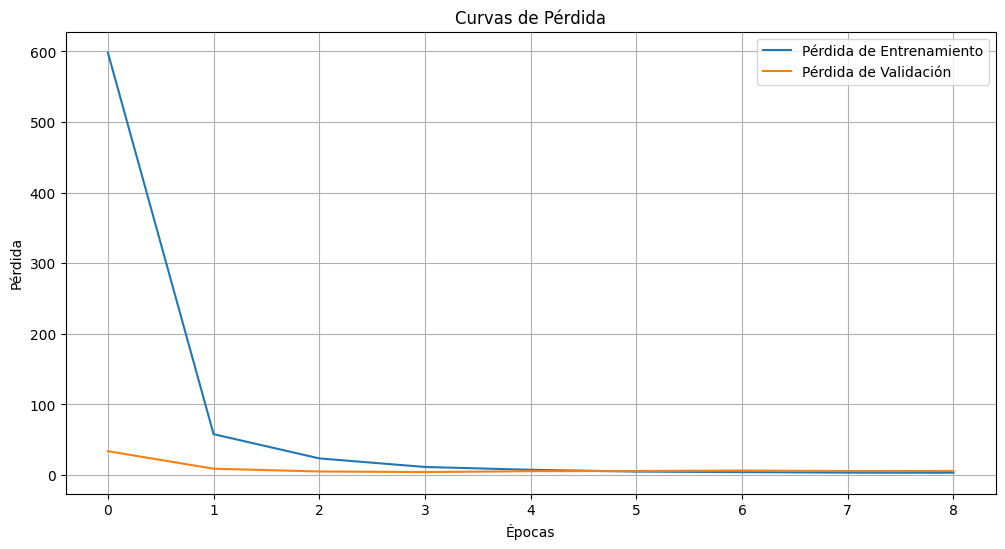

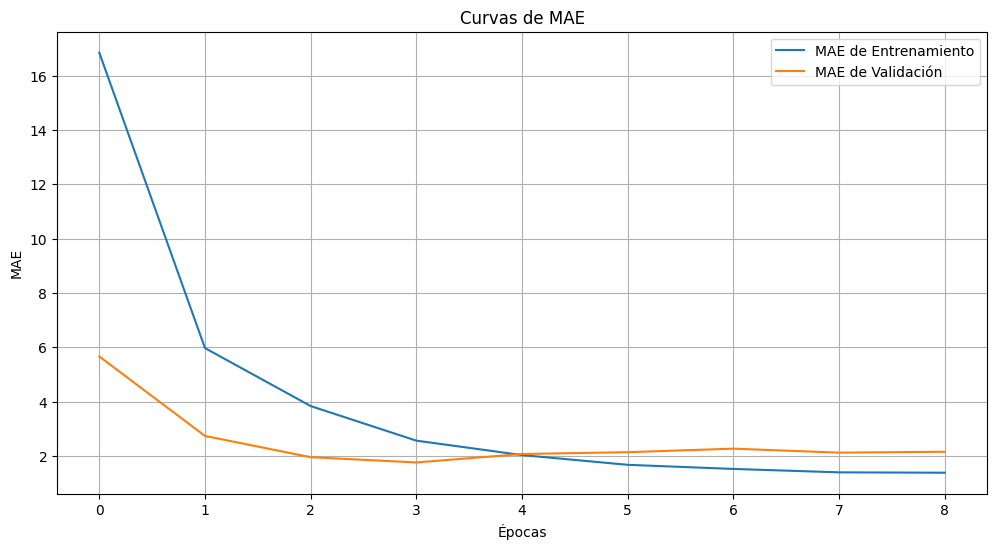

In [ ]:
# Generar curvas de aprendizaje

# Curva de pérdida
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curvas de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# Curva de MAE
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='MAE de Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de Validación')
plt.title('Curvas de MAE')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

#Hallazgos
**Comparación de Modelos**

**Modelo 1 (model):**
Arquitectura:

Tres capas densas: 64, 32, 1 neuronas.
Total de parámetros: 116,357
Parámetros entrenables: 38,785
Optimización: Adam optimizer con tasa de aprendizaje ajustada.
Rendimiento:

Loss en conjunto de prueba: 2.1297
Mean Absolute Error (MAE) en conjunto de prueba: 1.1370

**Modelo 2 (model2):**
Arquitectura:

Tres capas densas con Dropout: 64, 32, 16 neuronas.
Total de parámetros: 117,893
Parámetros entrenables: 39,297
Optimización: Adam optimizer con tasa de aprendizaje ajustada.
Rendimiento:

Loss en conjunto de prueba: 1.79
Mean Absolute Error (MAE) en conjunto de prueba: 1.79

**Análisis Comparación:**

El Modelo 1 ha logrado un mejor MAE (1.1370) en comparación con el Modelo 2 (1.79). Esto indica que, en promedio, el Modelo 1 predice con menos error las calificaciones de las películas en el conjunto de prueba.
Complejidad del Modelo:

Ambos modelos tienen una cantidad similar de parámetros, con el Modelo 2 siendo ligeramente más complejo debido a la capa adicional y al uso de Dropout. Sin embargo, este aumento en la complejidad no ha llevado a una mejora en el rendimiento.


Dado que el Modelo 1 tiene un MAE más bajo y es ligeramente más simple, es más eficiente para esta tarea en particular. No solo predice mejor, sino que lo hace con menos complejidad, lo que podría traducirse en un tiempo de entrenamiento y predicción más rápidos.
Curvas de Aprendizaje:

Las curvas de aprendizaje mostradas anteriormente para el Modelo 2 indican que el modelo no está sobreajustando, pero tampoco mejora significativamente con las capas adicionales y el Dropout.



#**Conclusiónes:**

Aunque se esperaba que el modelo más complejo mejorara el rendimiento, los resultados mostraron que el modelo sencillo (Modelo 1) fue más eficaz, logrando un MAE más bajo. Esto sugiere que para este conjunto de datos y tarea específica, una arquitectura más simple es suficiente y quizás preferible para evitar la sobrecomplicación.

Tiempo de Entrenamiento: Notablemente, el Modelo 2 fue mucho más rápido en entrenamiento, lo cual puede ser debido a varios factores, incluyendo la inicialización de pesos y la carga del sistema. Sin embargo, dado que la precisión es más importante en este contexto, el tiempo de entrenamiento más largo del Modelo 1 se justifica.

Decisión Final: Basado en esta comparación, se recomienda el uso del Modelo 1 para la predicción de calificaciones (rating), dado su mejor rendimiento en términos de MAE, lo que lo convierte en una opción más adecuada para este proyecto. La simplicidad del modelo también facilita su implementación y mantenimiento.

#Ejercicio Clase Final MNIST

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
train_images.shape

(60000, 28, 28)

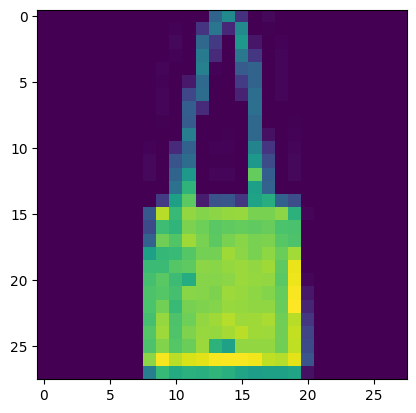

In [ ]:
plt.imshow(train_images[200])

In [ ]:
#normalizar imagen
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
#clasificar imagen con red perceptron multicapa
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #aplana imagen vector de caracteristicas 1 vector
    tf.keras.layers.Dense(128, activation='relu'), # red densa de 128 capas, activada por la funcion relu 1 a 0
    tf.keras.layers.Dense(10, activation ="softmax") #
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
historia = model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7655 - loss: 0.6835
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8613 - loss: 0.3924
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8726 - loss: 0.3530
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8802 - loss: 0.3279
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8896 - loss: 0.2980
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8927 - loss: 0.2966
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8969 - loss: 0.2789
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9062 - loss: 0.2570
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9067 - loss: 0.2533
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9101 - loss: 0.2448


In [ ]:
clasifitacion = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
clasifitacion[0]

array([5.7445800e-07, 2.4021021e-10, 9.7534428e-07, 2.8069829e-09,
       9.3603639e-06, 1.0038466e-03, 5.8284677e-06, 3.1015144e-03,
       1.8151985e-06, 9.9587607e-01], dtype=float32)

In [ ]:
clasifitacion[0].argmax()

9

In [ ]:
 #Red convulucional
 model = tf.keras.models.Sequential([
    #convolucion
    tf.keras.layers.Conv2D(32,(3, 3), input_shape=(28, 28, 1),activation='relu'),
    #pooling
    tf.keras.layers.MaxPooling2D(2, 2),
    #ckasufucacion
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


agregar capas de convolucion y de pooling

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
historia = model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 57ms/step - accuracy: 0.7958 - loss: 0.5781
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 44ms/step - accuracy: 0.8974 - loss: 0.2870
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.9127 - loss: 0.2382
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 44ms/step - accuracy: 0.9244 - loss: 0.2050
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9338 - loss: 0.1787
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9420 - loss: 0.1563
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9509 - loss: 0.1348
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9555 - loss: 0.1210
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.9609 - loss: 0.1057
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9679 - loss: 0.0887


In [ ]:
clasification[0].argmax()

NameError: name 'clasification' is not defined

In [ ]:
hisstoria.history

NameError: name 'hisstoria' is not defined